In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import scipy.stats as stats

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1

In [25]:
hr = pd.read_csv("/Users/klimdajneko/Desktop/IT/Lessons/DS/Python_for_analitics_exam/HR.csv")
hr.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
1077,0.80,0.95,5,244,5,0,1,0,sales,medium
2535,0.51,0.58,3,155,3,0,0,0,sales,low
8904,0.94,0.49,2,250,5,0,0,0,support,low
10675,0.36,0.55,3,191,3,0,0,0,product_mng,high
7766,0.80,0.99,5,187,3,1,0,0,technical,medium
8606,0.91,0.50,3,276,4,0,0,0,support,low
2430,0.93,0.53,3,200,3,1,0,0,product_mng,low
7669,0.82,0.51,3,210,2,0,0,0,technical,low
714,0.40,0.51,2,144,3,0,1,0,accounting,low
8272,0.69,0.80,5,263,3,1,0,0,accounting,medium


In [26]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<Axes: >

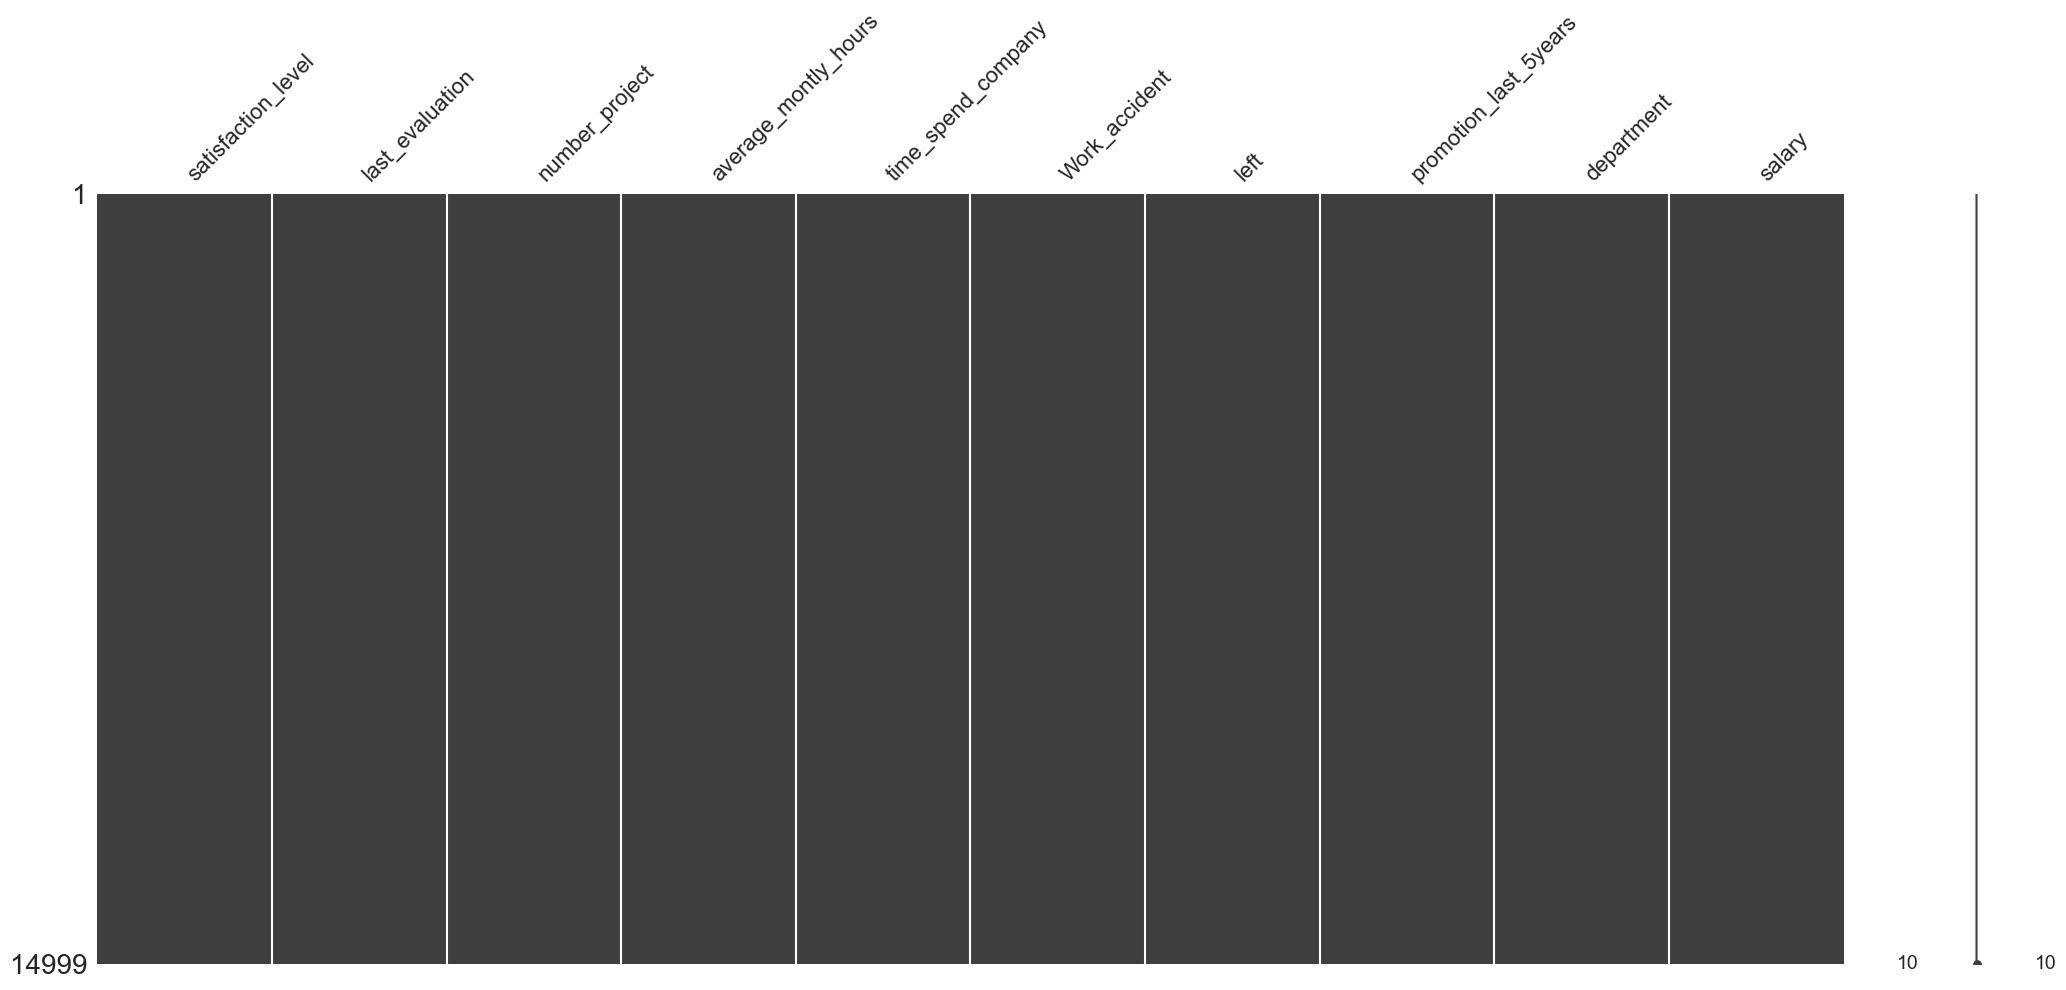

In [27]:
msno.matrix(hr)

# 2

In [28]:
statistics = (hr
              .select_dtypes(include=["float64", "int64"])
              .describe(include='all')
              .reset_index()
              .rename(columns={"index": "agg"}))
mode_values = [hr[c].mode().iloc[0] for c in hr.select_dtypes(include=["float64", "int64"]).columns]
statistics.loc[len(statistics.index)] = ["mode"] + mode_values
statistics

,agg,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
1,mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
2,std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
3,min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
4,25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
5,50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
6,75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
7,max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
8,mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


# 3

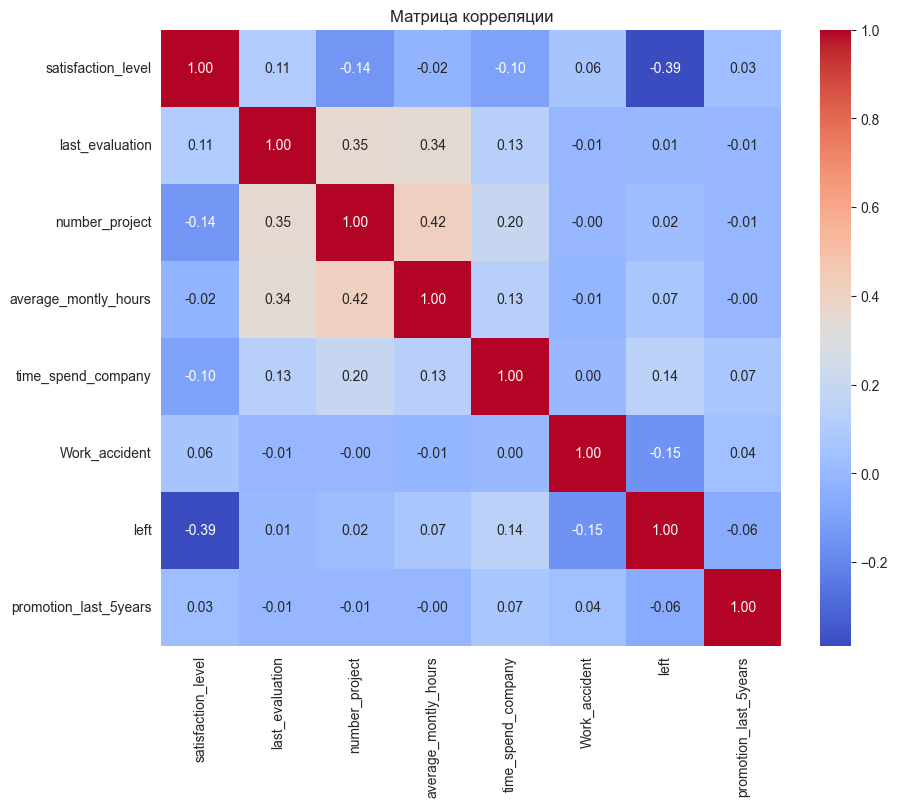

In [29]:
# Создаем матрицу корреляции
corr = hr.select_dtypes(include=["float64", "int64"]).corr()

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

In [30]:
corr = (corr
        .unstack()
        .reset_index()
        .rename(columns={"level_0": "feature_1",
                         "level_1": "feature_2",
                         0: "corr"}))
corr["abs_corr"] = abs(corr["corr"])
corr = corr[~corr.abs_corr.eq(1)].sort_values(by="abs_corr", ascending=False)

In [31]:
# Два самых скоррелированных признака
max_corr = corr.iloc[0]
max_corr

feature_1    average_montly_hours
feature_2          number_project
corr                     0.417211
abs_corr                 0.417211
Name: 26, dtype: object

In [32]:
# Два наименее скоррелированных признака
min_corr = corr.iloc[-1]
min_corr

feature_1         Work_accident
feature_2    time_spend_company
corr                    0.00212
abs_corr                0.00212
Name: 44, dtype: object

# 4

In [33]:
ex_4 = hr.groupby("department").agg(len).reset_index().iloc[:, :2]
ex_4.columns = ["department", "the_number_of_employees"]
ex_4

,department,the_number_of_employees
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


# 5

In [34]:
fig = px.histogram(hr,
                   x="salary",
                   width=800,
                   color="salary",
                   title="График распределения заработных плат",
                   template="plotly_dark")

fig.update_layout(
    legend_title="Salary level:",
    xaxis_title="Salary",
    yaxis_title="The_number_of_employees",

)
fig.show()

# 6

In [35]:
for name, df in hr.groupby("department"):
    fig = px.histogram(df,
                       x="salary",
                       color="salary",
                       title=f"График распределения заработных плат, департамент - {name}",
                       template="plotly_dark",
                       text_auto=True,
                       width=800,
                       height=400)

    fig.update_layout(
        legend_title="Salary level:",
        xaxis_title="Salary",
        yaxis_title="The_number_of_employees",

    )
    fig.show()

# 7

In [36]:
low = hr[hr.salary.eq("low")]["average_montly_hours"]
high = hr[hr.salary.eq("high")]["average_montly_hours"]

In [37]:
def check_normality(data, alpha=0.05):
    if len(data) < 5000:
        stat, p_value = stats.shapiro(data)
    else:
        stat, p_value = stats.kstest(data, "norm")

    if p_value > alpha:  # условие статистической значимости
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
    else:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")

In [38]:
check_normality(low), check_normality(high)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
Отклоняем нулевую гипотезу >> Данные распределены не нормально


(None, None)

In [39]:
stat, p = stats.mannwhitneyu(low, high)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


# 8

In [40]:
for name, df in hr.groupby("left"):
    title = "Уволившиеся" if name else "НЕ уволившиеся"
    part_of_promotions = round(df.promotion_last_5years.sum() / len(df) * 100, 2)
    mean_satisfaction_level = round(df.satisfaction_level.mean(), 2)
    mean_number_project = round(df.number_project.mean(), 2)
    print(
        f"Категория: {title}\n"
        f"Доля сотрудников с повышением за последние 5 лет: {part_of_promotions}%\n"
        f"Средняя степень удовлетворенности: {mean_satisfaction_level}\n"
        f"Среднее количество проектов: {mean_number_project}\n"
    )

Категория: НЕ уволившиеся
Доля сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79

Категория: Уволившиеся
Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86


# 9

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(hr.drop(columns=["left", "department", "salary"]))
y = hr.left
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

In [42]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predict = lda.predict(X_test)
result = pd.DataFrame([y_test.reset_index(drop=True), predict]).T

In [43]:
a_score = accuracy_score(y_test, predict)
a_score

0.7694807900658388

In [44]:
# После того как мы подогнали модель, используя наши данные, 
# мы можем оценить, насколько хорошо модель работает, 
# используя повторную стратифицированную k-кратную перекрестную проверку
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)
f"Мы видим, что модель показала среднюю точность {np.mean(scores) * 100:.2f}%"

'Мы видим, что модель показала среднюю точность 74.96%'